In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv
/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv
/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.isna().sum()


Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
df.shape

(30, 3)

In [8]:
df.isnull()

,Unnamed: 0,YearsExperience,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_no_dup = df.drop_duplicates()


In [11]:
print(df.columns)

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

[]

In [14]:
for feature in categorical_features:
    df[feature] = LabelEncoder().fit_transform(df[feature])
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [16]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [17]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [18]:
X_train = df.drop("Salary", axis=1)
Y_train = df["Salary"]
X_test = df.drop("Salary", axis=1)
X_train.shape, Y_train.shape, X_test.shape

logreg = LinearRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

95.76

In [19]:
std_s = StandardScaler().fit(X_train)
x_train = std_s.transform(X_train)
x_test = std_s.transform(X_test)

In [20]:
X = df[['YearsExperience']]
y = df['Salary']



In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:

y_pred = model.predict(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:

from sklearn.metrics import r2_score
Er1=r2_score(y_train,lin_reg.predict(X_train))
print('R squared of Linear Regression :', Er1)

R squared of Linear Regression : 0.9411949620562127


In [26]:
from sklearn.metrics import r2_score
Er1=r2_score(y_test,lin_reg.predict(X_test))
print('R squared of Linear Regression :', Er1)

R squared of Linear Regression : 0.988169515729126


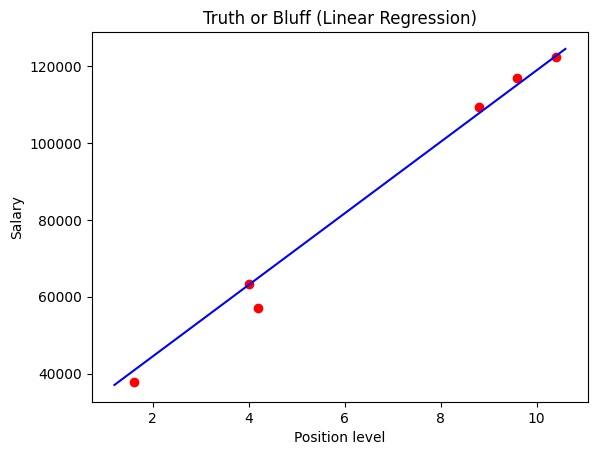

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


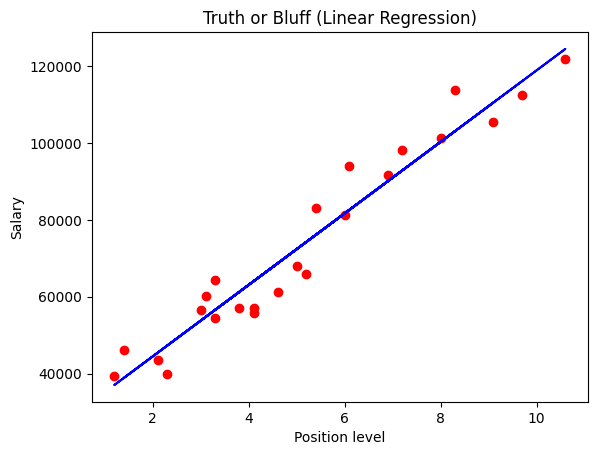

In [28]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train.values.ravel())

LinearRegression()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
X= df.iloc[:,0].values
y= df.iloc[:,1].values

In [32]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [33]:
train_pred_lin = linear_model.predict(X_train)
train_r2_lin = r2_score(y_train, train_pred_lin)

In [34]:
test_pred_lin = linear_model.predict(X_test)
test_r2_lin = r2_score(y_test, test_pred_lin)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9935532289252154
RMSE: 0.1866628160332643


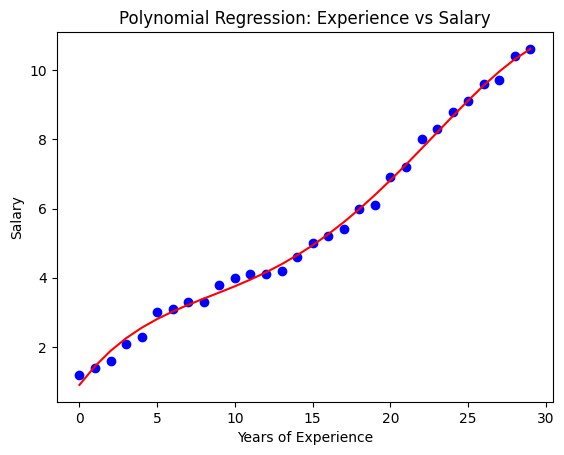

In [37]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg2.predict(poly.fit_transform(X)), color='red')
plt.title('Polynomial Regression: Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10 , random_state=42)
rf_reg.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=10, random_state=42)

In [40]:
y_train_pred = rf_reg.predict(X_train)

In [41]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"R2: {train_r2:.2f}")

R2: 1.00


In [42]:
y_test_pred = rf_reg.predict(X_test)

In [43]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"R2: {test_r2:.2f}")

R2: 1.00


In [44]:
from sklearn.ensemble import RandomForestRegressor

# تدريب نموذج Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# التنبؤ
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

# حساب R²
train_r2_rf = r2_score(y_train, train_pred_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)

# تحديث جدول النتائج
results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "Train R²": train_r2_lin,
        "Test R²": test_r2_lin
    },
    {
        "Model": "Polynomial Regression (deg=4)",
        "Train R²": train_r2_poly,
        "Test R²": test_r2_poly
    },
    {
        "Model": "Random Forest Regression",
        "Train R²": train_r2_rf,
        "Test R²": test_r2_rf
    }
])

# عرض الجدول
print(results)


NameError: name 'train_r2_poly' is not defined